# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [28]:
# # importing libraries

from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

In [29]:
# # loading dataset

data = pd.read_csv('datasets/data.csv')
data.shape

# # there are 6819 rows and 96 columns

(6819, 96)

# # pre-processing data

In [31]:
# # checking for any missing values, and if the count of values in every column tally
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [32]:
# # splitting data into features (x) and target varaible (y)

y = df['Bankrupt?']                             
x = df.drop(columns=['Bankrupt?'])

# # splitting the dataset into training and test sets to evaluate model's performance 
# # we chose test size 0.3 beacuse 30% of the data allocated for testing and 70% for training.
# # this avoids over-fitting as a small test set relies on  too few examples, increasing the chances of overfitting.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# # feature scaling (Standardisation): initializing the scaler
scaler = StandardScaler() 

# # computing mean and stdev of training data, & scales it accordingly
x_trained_scaled = scaler.fit_transform(x_train)

# # transforming the test data using the same scaler
x_test_scaled= scaler.transform(x_test)

simple (binary) logistic regression model

* since our y target is binomial, we use the simple logistic regression model

In [33]:
# # a small regularization strength is used to prevent model from overfitting (by adding a penalty to large coefficients)
# # penalty refers to L2 Regularization (Adds sum of squared coefficients to loss function)
REG_CONST = 0.01

# # creating a model and fit it to the training data.
# # C=1/REG_CONST is the inverse of regularization strength
# # lower C = 1/0.01 = 100 means a weaker regularization is used (Allows for more flexibility)
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_trained_scaled, y_train)

# # predicing the classes of test data and measuring the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean() #Proportions of correct predictions 
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.968


* proportion of correct predicitons made by model using the test data = 0.968, which is a good accuracy score.

# # ROC curve and confusiuon matrix

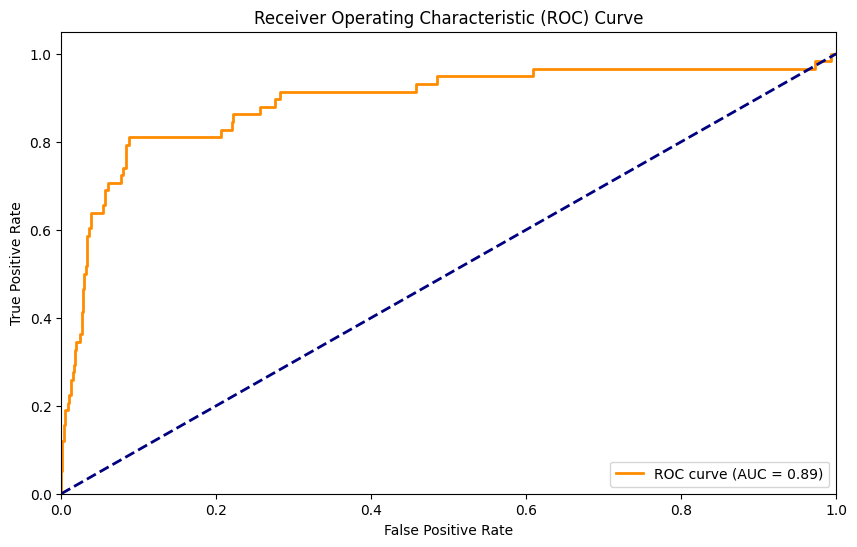

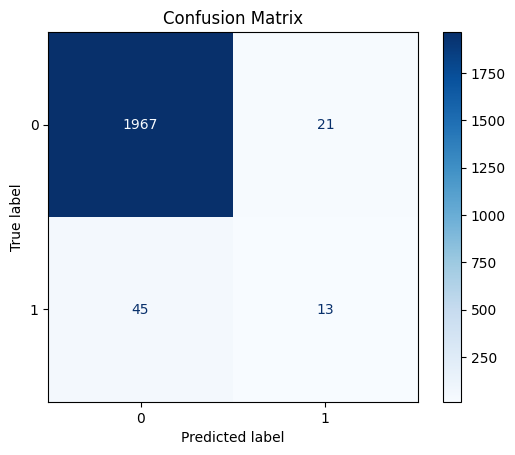

AUC Score: 0.890
F1 Score: 0.283

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1988
           1       0.38      0.22      0.28        58

    accuracy                           0.97      2046
   macro avg       0.68      0.61      0.63      2046
weighted avg       0.96      0.97      0.96      2046



In [34]:
# # getting prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# # calculating ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# # plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# # creating and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# # calculating F1 score
f1 = f1_score(y_test, y_pred)

# # printing AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# # printing Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AUC Score = 0.865

* measures model abiility to distinguish between positive and negative classes across all possible classification thresholds, 1.0 being the perfect distinction between classes
* a high AUC score means the model is quite effective, and has good discriminative power to distinguish between classes.

F1 Score = 0.227

* model is struggling to balance precision and recall metrics
* especially true for positive class. This could be due to the fewer instances of companies that went bankrupt (1) in the given dataset

From classification report:

Class 0

* precision = 0.98, Recall = 0.99, F1-Score = 0.98.
* model is precise in predicting negative classes, good at identifying most of true negative instances as negative. Balance is high.

Class 1

* precision = 0.31, Recall = 0.18, F1-Score = 0.23.
* model is poor in predicting positive class, and poor in identifying true positive instances correctly (only 18% correct). Labels 82% of true positive instances as false negatives.

Key takeaway from this model: Significant class imbalance.

# # decision tree (with class weights)

* from the confusion matrix, we have discovered that the data has high class imbalance. To combat this, we shall use another model: weighted decision tree.

### * finding the optimal depth for our decision tree

Depth = 1, train_acc = 0.9677, eval_acc = 0.9697
Depth = 2, train_acc = 0.9709, eval_acc = 0.9697
Depth = 3, train_acc = 0.9715, eval_acc = 0.9726
Depth = 4, train_acc = 0.9746, eval_acc = 0.9687
Depth = 5, train_acc = 0.9790, eval_acc = 0.9668
Depth = 6, train_acc = 0.9824, eval_acc = 0.9658
Depth = 7, train_acc = 0.9878, eval_acc = 0.9668
Depth = 8, train_acc = 0.9908, eval_acc = 0.9638


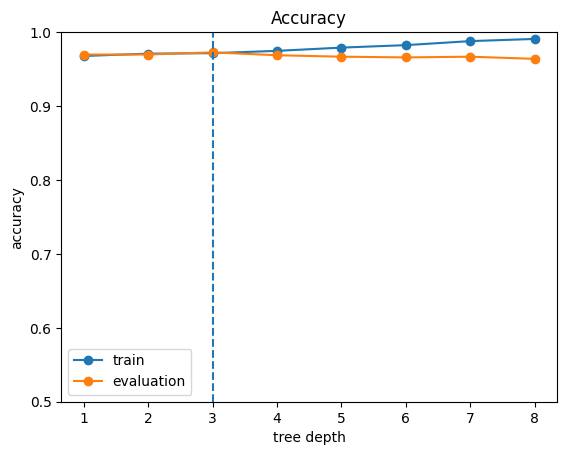

In [42]:
# # separating the data into features and target class.
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# # plitting the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# # creating decision tree models of various depths, 
# # and measuring the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # # measuring the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # # measuring the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# # finding the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# # visualising accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 3, test_acc = 0.9110


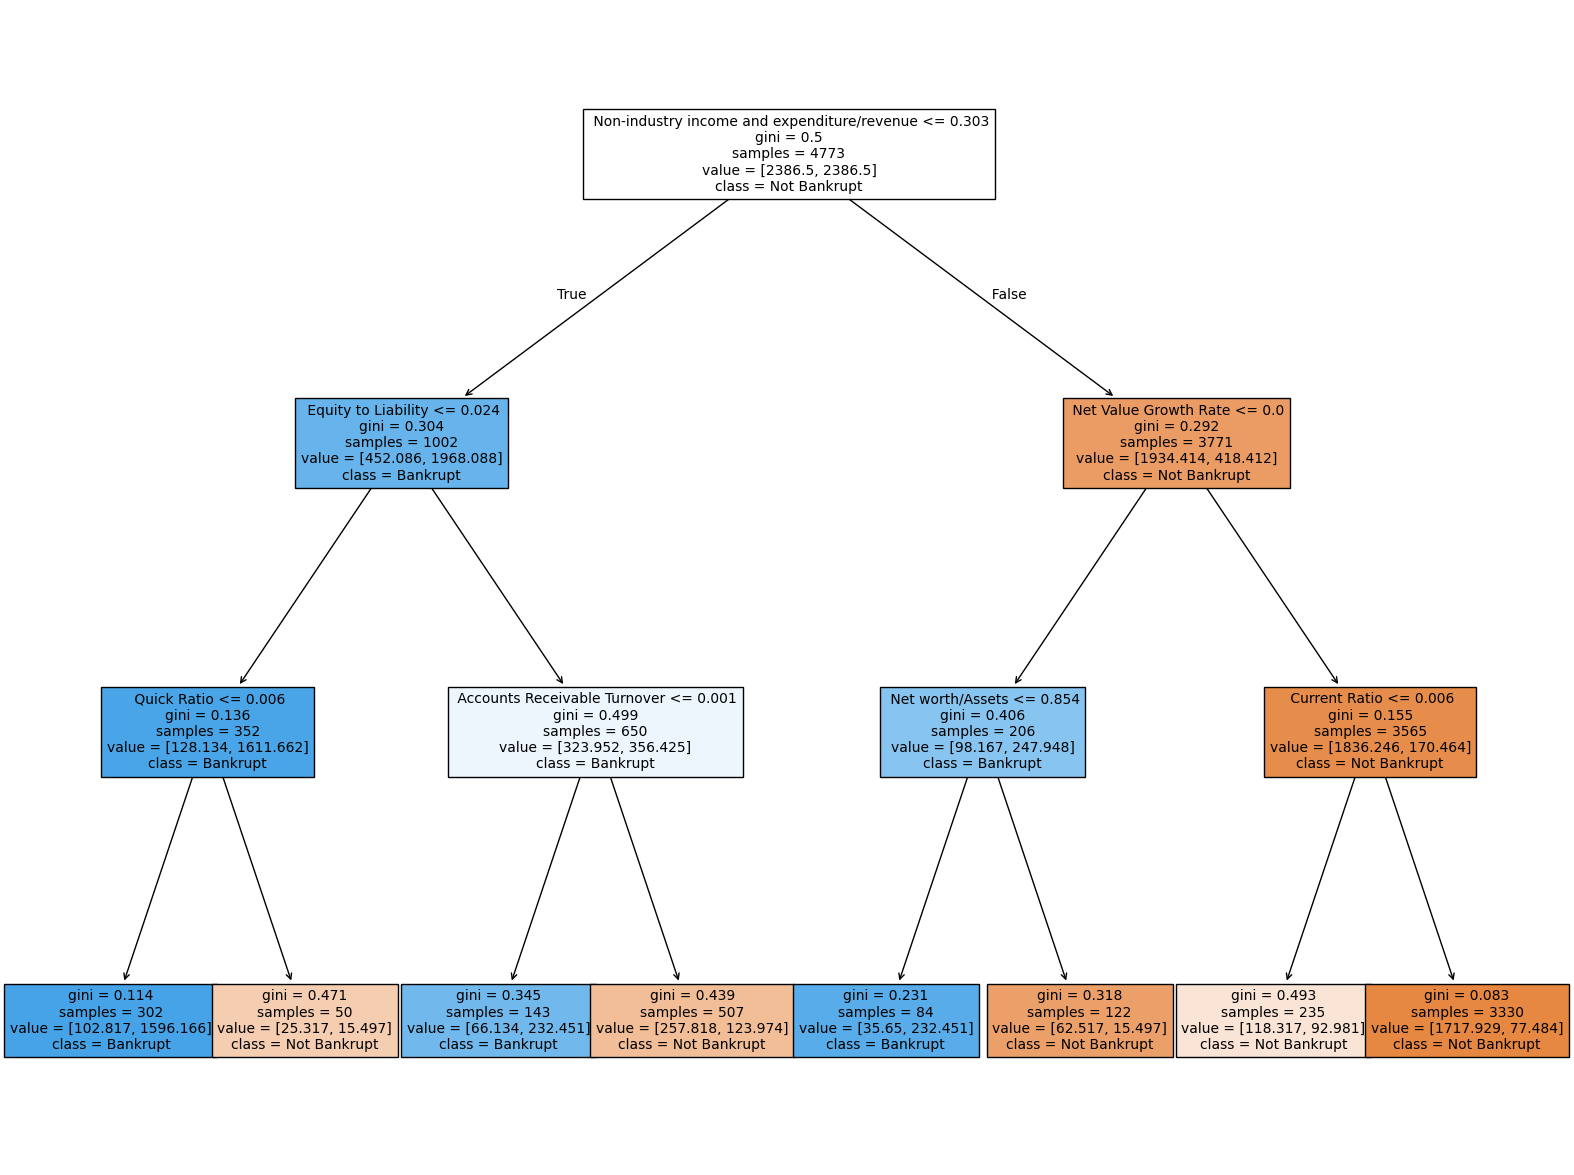

In [46]:
# # setting max_depth as 3 as it has the highest accuracy of validation data.
# # using a balanced class weight to solve high class imbalance in data. 
model = DecisionTreeClassifier(max_depth=3,
                               random_state=42,
                               class_weight='balanced')
model.fit(x_train, y_train)

# # using test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# # visualising the tree
feat_names = x.columns.tolist()
plt.figure(figsize=(20,15))
tree.plot_tree(model, 
               feature_names = feat_names, 
               class_names=['Not Bankrupt', 'Bankrupt'],
               filled=True, # # blue represents Not Bankrupt  # # orange represents Bankrupt 
               fontsize=10)
plt.show()

# # feature importance
* side quest to find out which variables affect the chances of a company declaring bankruptcy!

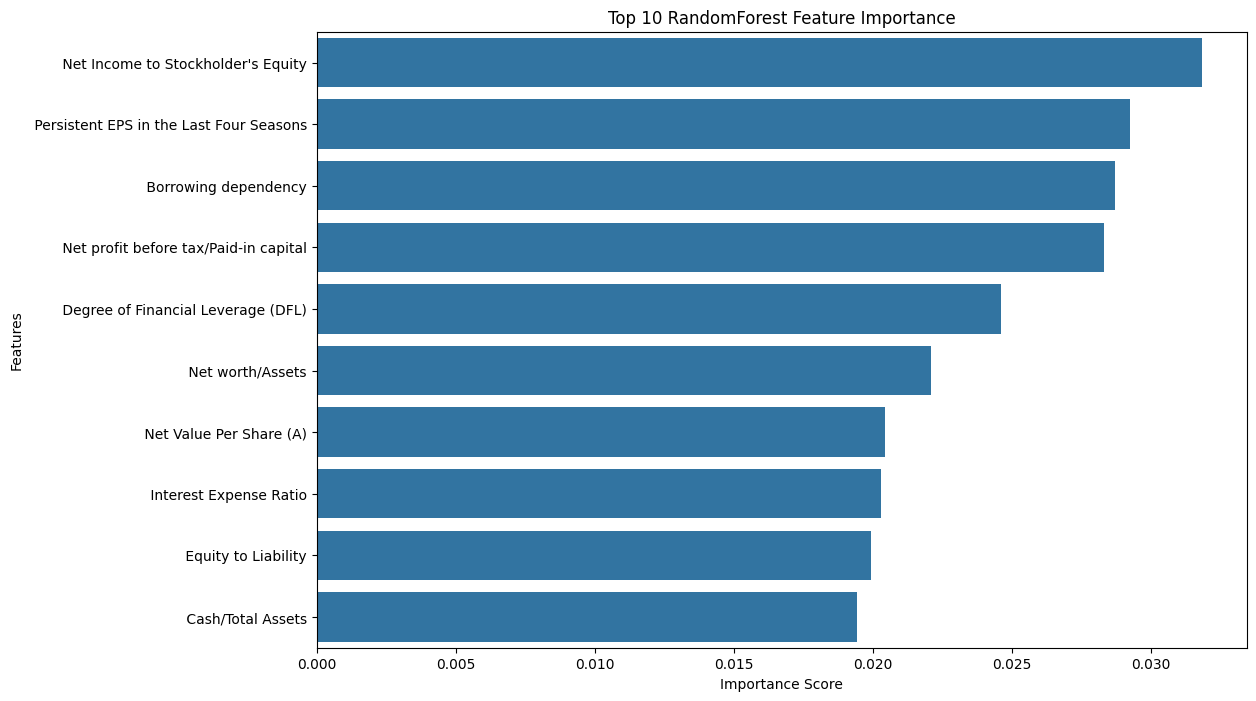

In [47]:
# # separating features and target variable
target_column = 'Bankrupt?'  # Target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# # feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# # training RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)

# # feature importance from RandomForest
rf_importances = rf_model.feature_importances_
rf_features = df.drop(columns=[target_column]).columns

# # getting the top 10 features based on importance
top_n = 10
sorted_indices = np.argsort(rf_importances)[::-1]  # Sort indices in descending order
top_indices = sorted_indices[:top_n]  # Get indices of the top 10 features

top_importances = rf_importances[top_indices]
top_features = rf_features[top_indices]

# # plotting the top 10 RandomForest feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=top_importances, y=top_features)
plt.title(f'Top {top_n} RandomForest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()